In [1]:
%matplotlib inline

In [8]:
#path = "data/dogscats/sample/"
path = "data/dogscats/"

In [9]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [11]:
import utils; reload(utils)
from utils import plots


ImportError: No module named utils

In [5]:
batch_size=64

In [13]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16

In [14]:
vgg=Vgg16()

In [15]:
train_batch=vgg.get_batches(path+'train',batch_size=batch_size)
valid_batch = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
vgg.finetune(train_batch)

In [32]:
vgg.fit(train_batch,valid_batch,nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 641s - loss: 0.1191 - acc: 0.9680 - val_loss: 0.0554 - val_acc: 0.9855


In [17]:
#vgg.model.save_weights("lesson1_moje_cats_and_dogs_weights_ver1.h5")
vgg.model.load_weights("lesson1_moje_cats_and_dogs_weights_ver1.h5")

In [33]:
1+1

2

1+1

In [18]:
imgs,labels=next(train_batch)

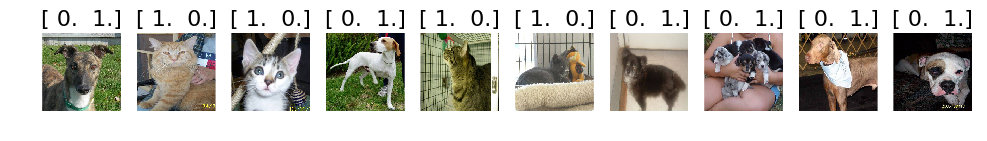

In [28]:
plots(imgs[:10],titles=labels)

In [22]:
vgg.predict(imgs)

(array([ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9088,  0.9997,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  0.9981,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  0.9974,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  0.9999,  0.998 ,  0.9985,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ], dtype=float32),
 array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 0]),
 ['dogs',
  'cats',
  'cats',
  'dogs',
  'cats',
  'cats',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  '

In [14]:
imgs.shape

(16, 3, 224, 224)

In [23]:
vgg.model.predict(imgs)

array([[  3.0372e-10,   1.0000e+00],
       [  1.0000e+00,   1.6323e-09],
       [  1.0000e+00,   8.7238e-12],
       [  7.3645e-12,   1.0000e+00],
       [  1.0000e+00,   1.7791e-10],
       [  9.0877e-01,   9.1234e-02],
       [  9.9972e-01,   2.7823e-04],
       [  3.9106e-07,   1.0000e+00],
       [  8.2604e-16,   1.0000e+00],
       [  8.2726e-14,   1.0000e+00],
       [  1.8016e-10,   1.0000e+00],
       [  2.8309e-09,   1.0000e+00],
       [  1.0000e+00,   2.1784e-11],
       [  2.2214e-07,   1.0000e+00],
       [  1.0000e+00,   2.6736e-10],
       [  1.7141e-09,   1.0000e+00],
       [  5.7203e-07,   1.0000e+00],
       [  6.9173e-11,   1.0000e+00],
       [  1.0000e+00,   4.8671e-13],
       [  1.0000e+00,   2.4133e-09],
       [  9.9997e-01,   2.8294e-05],
       [  8.9574e-08,   1.0000e+00],
       [  4.8542e-06,   1.0000e+00],
       [  6.3125e-10,   1.0000e+00],
       [  2.4344e-06,   1.0000e+00],
       [  9.9999e-01,   6.3646e-06],
       [  9.9808e-01,   1.9155e-03],
 

In [16]:
vgg.model.predict(imgs).shape

(16, 2)

In [17]:
vgg.classes

['cats', 'dogs']

To do:
1. Download data from kagel [x]
2. Spilt to data/cats dirs
3. Finetune
4. Submit

### Spilt data 

In [1]:
%cd data_kagel/dogscats

/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats


In [3]:
%cd train/

/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats/train


In [4]:
%pwd

u'/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats/train'

In [5]:
%mkdir ../valid/

In [12]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i],"../valid/"+shuf[i])

In [13]:
%mkdir ../sample
%mkdir ../sample/train
%mkdir ../sample/valid

In [14]:
from shutil import copyfile


In [15]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i],"../sample/train/"+shuf[i])

In [17]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i],"../sample/valid/"+shuf[i])

In [18]:
%pwd

u'/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats/train'

In [20]:
%mkdir cats

In [21]:
%mkdir dogs

In [22]:
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats/train


In [27]:
%cd ../../..

/home/ubuntu
anaconda2/  courses/  downloads/  git/  nbs/


In [32]:
path = "data_kagel/dogscats/"

In [33]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [69]:
import utils; reload(utils)
from utils import plots
from utils import save_array


In [35]:
batch_size=64

In [36]:
import vgg16;reload(vgg16)
from vgg16 import Vgg16

In [37]:
vgg=Vgg16()


In [46]:
train_batch = vgg.get_batches(path+'train',batch_size=batch_size)
valid_batch = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [47]:
vgg.finetune(train_batch)

In [49]:
vgg.fit(train_batch,valid_batch,nb_epoch=2)

Epoch 1/2
23000/23000 [==============================] - 641s - loss: 0.1209 - acc: 0.9685 - val_loss: 0.0787 - val_acc: 0.9780
Epoch 2/2
23000/23000 [==============================] - 642s - loss: 0.1040 - acc: 0.9762 - val_loss: 0.0815 - val_acc: 0.9785


In [51]:
vgg.model.save_weights(path+'results/moje_ep2_full_ver1.h5')

### Submit

In [63]:
batches,preds=vgg.test(path+'test',batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [64]:
filenames = batches.filenames

In [66]:
preds[:5]

array([[  1.0000e+00,   8.5492e-12],
       [  9.8764e-01,   1.2359e-02],
       [  1.0000e+00,   2.4191e-06],
       [  1.0000e+00,   5.8427e-15],
       [  7.9378e-09,   1.0000e+00]], dtype=float32)

In [70]:
save_array(path+'results/test_presd.dat',preds)
save_array(path+'results/test_presd.dat',filenames)

In [68]:
filenames[:5]

['test/9292.jpg',
 'test/12026.jpg',
 'test/9688.jpg',
 'test/4392.jpg',
 'test/779.jpg']

In [104]:
isdog=np.clip(preds[:,1],0.05,0.95)

In [92]:
ids=[int(f[5:f.find('.')]) for f in filenames ] 
ids[:5]

[9292, 12026, 9688, 4392, 779]

In [105]:
subm=np.stack([ids,isdog],axis=1)

In [106]:
subm[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   5.0000e-02],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [107]:
subm_sorted=subm[np.argsort(subm[:,0])]

In [108]:
subm_sorted[:5]

array([[ 1.  ,  0.95],
       [ 2.  ,  0.95],
       [ 3.  ,  0.95],
       [ 4.  ,  0.95],
       [ 5.  ,  0.05]])

In [109]:
np.savetxt(path+'subm_ver2.csv',subm_sorted,fmt='%d,%.5f',header='id,label',comments='')

In [111]:
from IPython.display import FileLink
FileLink(path+'subm_ver2.csv')

/home/ubuntu/courses/deeplearning1/nbs/data_kagel/dogscats/subm_ver2.csv